<a href="https://colab.research.google.com/github/Ddasunsandeepa/DeepLearning-with-Tensorflow/blob/main/01.Tensorflow_with_regression/Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [468]:
!pip install opendatasets

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import tensorflow as tf
import numpy as np

In [470]:
od.download( "https://www.kaggle.com/datasets/andonians/random-linear-regression")

Skipping, found downloaded files in "./random-linear-regression" (use force=True to force download)


In [471]:
df = pd.read_csv("random-linear-regression/test.csv")

In [472]:
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [473]:
df.shape

(300, 2)

In [474]:
x = df['x']
y = df['y']

In [475]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [476]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


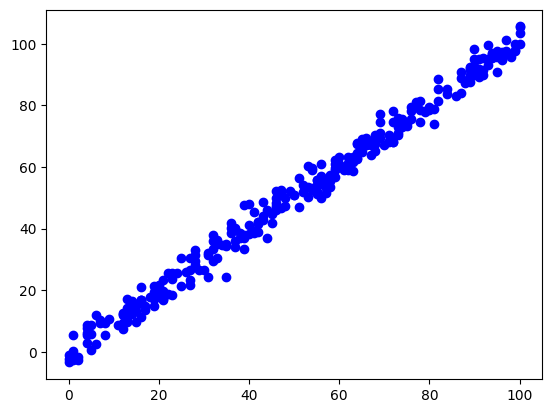

In [477]:
plt.scatter(x,y,c='b')
plt.show()

In [478]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

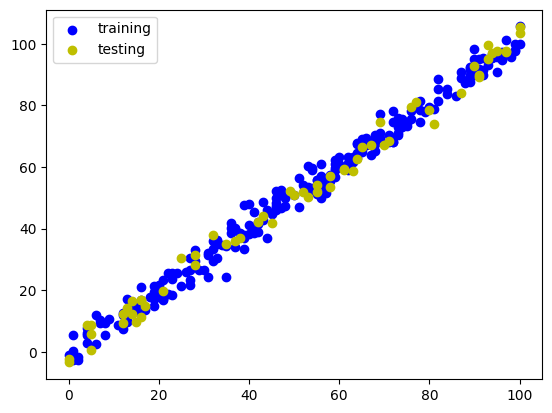

In [479]:
plt.scatter(X_train,y_train,c='b', label ="training")
plt.scatter(X_test,y_test,c='y', label ="testing")
plt.legend()
plt.show()

In [480]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [481]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics = ['mae']
)

In [482]:
history = model.fit(tf.expand_dims(X_train , axis =1) , y_train , epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 35.6108 - mae: 35.6108
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1069 - mae: 9.1069 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3142 - mae: 7.3142 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2662 - mae: 6.2662 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9877 - mae: 3.9877 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9225 - mae: 4.9225 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0924 - mae: 4.0924 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6971 - mae: 3.6971 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9168 - mae: 2.9168 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6441 - mae: 2.6441 


In [483]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [484]:
y_pred = model.predict(X_test)
y_pred[:5]
y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


(60, 1)

In [485]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


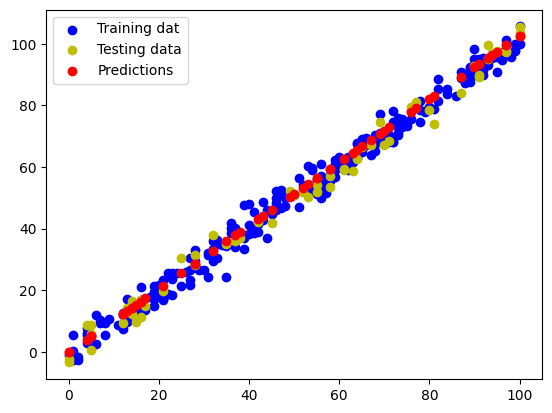

In [486]:
plt.scatter(X_train, y_train, c='b', label='Training dat')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()

plt. show()

In [487]:
model.evaluate(X_test , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.6524 - mae: 2.6524 


[2.682764768600464, 2.682764768600464]

In [488]:
y_pred.shape

(60, 1)

In [489]:
y_pred = model.predict(X_test).squeeze()
mae = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAE: 2.682764771505786


In [490]:
y_pred.shape

(60,)

In [491]:

me = tf.keras.losses.MeanAbsoluteError()
result = me(y_test, y_pred).numpy()
result

np.float32(2.6827648)

In [492]:

ms = tf.keras.losses.MeanSquaredError()
result = ms(y_test, y_pred).numpy()
result

np.float32(10.734801)

In [493]:
history.history

{'loss': [18.338537216186523,
  9.590004920959473,
  6.726485729217529,
  5.79317569732666,
  4.412779331207275,
  4.771083354949951,
  3.8067469596862793,
  3.5220558643341064,
  2.998577833175659,
  2.7240891456604004],
 'mae': [18.338537216186523,
  9.590004920959473,
  6.726485729217529,
  5.79317569732666,
  4.412779331207275,
  4.771083354949951,
  3.8067469596862793,
  3.5220558643341064,
  2.998577833175659,
  2.7240891456604004]}

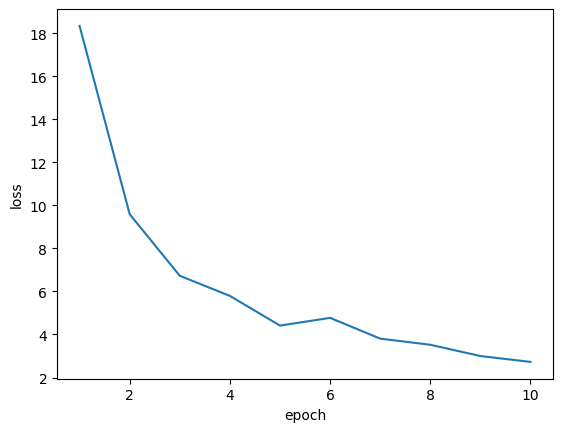

In [495]:
x_range = range(1, 10+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [496]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.00190546 -0.14559075  0.30213988 -0.0139071  -0.01515962  0.04114508
   0.20162766  0.14056322  0.00374603 -0.00353685 -0.004122    0.01579868
   0.00166559  0.03820615  0.03372185  0.02512109 -0.00102257  0.01519776
   0.02626948  0.25271583  0.00754236  0.01442135  0.2949964   0.01894074
  -0.05736025 -0.00197259 -0.2497755   0.06631579 -0.00375927 -0.3059392
   0.01739493  0.00936175  0.13528089  0.09428821 -0.02511247  0.12725803
   0.02618081 -0.29436547  0.09762175 -0.01678825  0.04463359 -0.12042334
   0.17680956  0.04791406  0.0833269   0.04608346  0.13545412  0.05450751
   0.25729364  0.00226467  0.0115764   0.10761341  0.01813592 -0.00559397
  -0.00535331 -0.00062012  0.0183607  -0.13038301  0.01520926  0.09439855
   0.02150835 -0.03197581  0.07960876  0.10516758]] 
Biases:
 [ 0.07985377  0.18315396 -0.01054879  0.18826276 -0.10363305 -0.24298474
 -0.1158182  -0.11159007  0.18263815 -0.07056893  0.01374661 -0.16408011
  0.05790665 -0.03141387 -0.23820955  0.06